# ECG Classification: ECG_Heartbeat_Classification

This notebook provides an in-depth **Exploratory Data Analysis (EDA)** on the **MIT-BIH Arrhythmia Dataset**, which is part of the **ECG Heartbeat Categorization** project. The primary objective of this project is to classify **ECG signals** into different heartbeat categories for the purpose of automated cardiac health monitoring.

### Key Steps in the Analysis:
- **Data Loading**: Importing and preparing the MIT-BIH Arrhythmia dataset for analysis.
- **Statistical Summaries**: Generating descriptive statistics to understand the underlying patterns of the dataset.
- **Missing Value Analysis**: Identifying and handling missing values to ensure data integrity.
- **Data Visualizations**: Creating various visualizations to gain insights into the distribution and relationships of features.

The goal of this project is to apply advanced machine learning techniques to classify ECG signals accurately, ultimately contributing to the development of efficient and reliable heartbeat categorization systems for healthcare applications.


First we have to import the necessary dependencies.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import decimate
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

# Load the data
* Converting CSV files to Pandas dataframe
* concatenating the train and test set to a single Pandas dataframe

In [38]:
# Define file paths
training_path = '../data/raw/mitbih_train.csv'
testing_path = '../data/raw/mitbih_test.csv'

# Load the training and testing data
train_df = pd.read_csv(training_path, header=None)
test_df = pd.read_csv(testing_path, header=None)

print(f"Train Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

df = pd.concat([train_df,test_df], axis = 0)
# Display dataset shapes
print(f"Dataset shape: {df.shape}")


Train Data Shape: (87554, 188)
Test Data Shape: (21892, 188)
Dataset shape: (109446, 188)


2. Take a Quick Look at the Data
* Perform initial exploration of the dataset (e.g., inspect the data types, check for missing values, and view a few records) to understand what we are working with.

In [39]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [40]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Show only columns with missing values
print(missing_values)

Series([], dtype: int64)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


In [42]:
df.duplicated().sum()

0

# Class Distribution

In [43]:
y = df.iloc[:, -1].astype(int)
class_distribution_train = y.value_counts()
print(class_distribution_train)

187
0    90589
4     8039
2     7236
1     2779
3      803
Name: count, dtype: int64


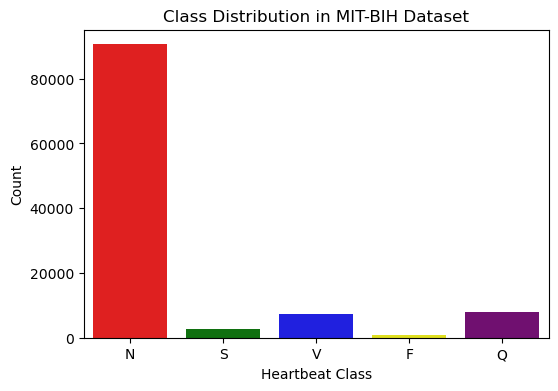

In [44]:
# Mapping numerical labels to class names
class_mapping = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
y = y.replace(class_mapping)

# Define a color palette for the plots
custom_palette = ['red', 'green', 'blue', 'yellow', 'purple']

# Plot class distribution for training data
plt.figure(figsize=(6,4))
sns.countplot(x=y, hue=y, palette=custom_palette, legend=False)
plt.title("Class Distribution in MIT-BIH Dataset")
plt.xlabel("Heartbeat Class")
plt.ylabel("Count")
plt.show()


From the preliminary analysis, we have determined that there are no missing values in the dataset. All columns are of float data type, and there are no categorical features. Additionally, we observed that the target variable exhibits class imbalance. To address this, we will employ stratified sampling for data splitting and incorporate class weights during model training to handle the imbalance effectively.

# Data Analysis (Exploratory Data Analysis or EDA) 
Use statistical and visualization techniques to understand the data better.

* Plotting a sample of each category

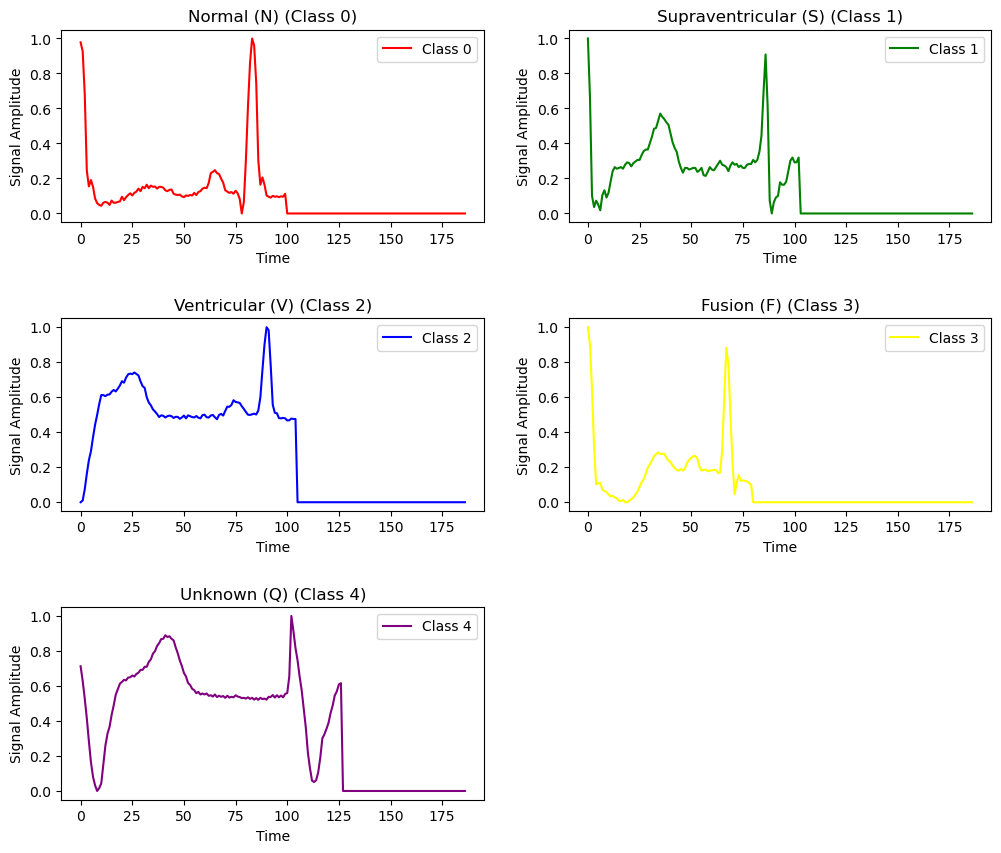

In [45]:
plt.figure(figsize=(12, 10))
class_mapping = {0: 'Normal (N)', 1: 'Supraventricular (S)', 2: 'Ventricular (V)', 3: 'Fusion (F)', 4: 'Unknown (Q)'}

for i, class_name in class_mapping.items():
    plt.subplot(3, 2, i+1)
    signal = df[df.iloc[:, -1] == i].iloc[0, :-1].values
    plt.plot(signal, label=f"Class {i}", color=custom_palette[i])
    plt.title(f"{class_name} (Class {i})")
    plt.xlabel("Time")
    plt.ylabel("Signal Amplitude")
    plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing
    plt.legend()

* Plot the first 5 ECG signal samples

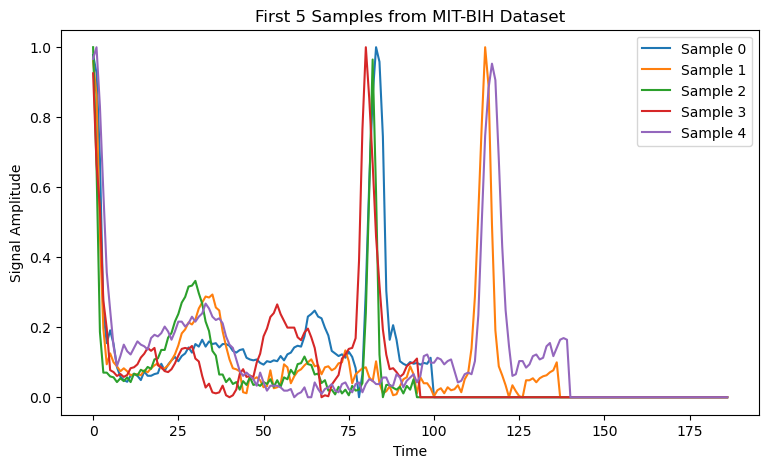

In [46]:
plt.figure(figsize=(9,5))
for i in range(5):
    signal = df.iloc[i, :-1].values  # Extract all but the last column
    plt.plot(signal, label=f"Sample {i}")
    
plt.title("First 5 Samples from MIT-BIH Dataset")
plt.xlabel("Time")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.show()

# Prepare the Data before Training

- **Clean the data**: Handle missing values, scale/normalize features, and encode categorical variables.
- **Feature engineering**: Create new features from existing ones.
  - **Gradient Computation**: Calculate the gradient of ECG signals to highlight transitions like heartbeats. This is done by computing the difference between consecutive data points and applying optional normalization for consistency.

In [47]:
# Extract features and labels from train_df
x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1].astype(int)

# Extract features and labels from test_df
x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1].astype(int)

### Data Augmentation and Class Imbalance Handling

Since the dataset is highly imbalanced, with the majority of samples belonging to Class 0, we applied two techniques to address this issue:

1. **SMOTE (Synthetic Minority Oversampling Technique)**: SMOTE was applied to oversample the minority classes (Classes 1, 2, 3, and 4) by generating synthetic samples. This helps balance the dataset by increasing the number of samples for the underrepresented classes.

2. **ENN (Edited Nearest Neighbors)**: After oversampling with SMOTE, **ENN** was used to clean the dataset by removing noisy or misclassified samples. This ensures that the generated synthetic samples (or any noisy points) do not negatively affect the model’s learning.

By using these two methods, we have achieved a more balanced dataset, which should help the model learn more effectively from all classes.


In [48]:
print("Class distribution before applying SMOTE:")
y_train.value_counts()

Class distribution before applying SMOTE:


187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [ ]:
# Initialize SMOTE to oversample the minority classes to match the target size
smote = SMOTE(sampling_strategy={1: 20000, 2: 20000, 3: 20000, 4: 20000}, random_state=42)
# Apply SMOTE to the preprocessed training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [28]:
print(f"Class distribution before applying SMOTE: {y_train_smote.value_counts()}")

Class distribution before applying SMOTE: 187
0    72471
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


In [29]:
# Apply ENN to remove noisy samples from the oversampled data
enn = EditedNearestNeighbours()
x_train_final, y_train_final = enn.fit_resample(x_train_smote, y_train_smote)

In [30]:
print(f"Class distribution after applying SMOTE: {y_train_final.value_counts()}")

Class distribution after applying SMOTE: 187
0    69512
1    20000
3    19987
4    19850
2    19625
Name: count, dtype: int64


3. **Downsampling Class 0**: To address the class imbalance in the dataset, we first applied **SMOTE** and **ENN** to balance the minority classes. Despite these efforts, the majority class (Class 0) still outnumbers the others by a significant margin. To further balance the dataset, we chose to **downsample Class 0**.
Downsampling Class 0 ensures that all classes have a more comparable number of samples. This prevents the model from being biased toward the majority class and promotes a more equitable learning process. By achieving a more uniform class distribution, the model is better equipped to learn from each class and improve generalization.

With this step completed, we will proceed to prepare the dataset for training, ensuring a balanced representation of all classes.


In [31]:
df_class_0_downsampled = x_train_final[y_train_final == 0].sample(n = 20000, random_state = 42)
df_class_rest = x_train_final[y_train_final != 0]

In [32]:
# Combine the downsampled Class 0 with the other classes
x_train_final_balanced = pd.concat([df_class_0_downsampled, df_class_rest])
y_train_final_balanced = pd.concat([y_train_final[y_train_final == 0].sample(n=20000, random_state=42), y_train_final[y_train_final != 0]])

In [33]:
# Check the class distribution after downsampling
print(f"class distribution after downsampling: {y_train_final_balanced.value_counts()}")

class distribution after downsampling: 187
0    20000
1    20000
3    19987
4    19850
2    19625
Name: count, dtype: int64


### Save Preprocessed Data

After preprocessing the data and handling class imbalance, we saved the final training and test datasets to CSV files for further use.


In [35]:
x_train_final_balanced.shape, x_test.shape

((99462, 187), (21892, 187))

In [ ]:
# Save the final preprocessed training data (features and labels)
x_train_final_balanced.to_csv('../data/processed/x_train.csv', index=False, header=False)
y_train_final_balanced.to_csv('../data/processed/y_train.csv', index=False, header=False)

# Save the final preprocessed testing data (features and labels)
x_test.to_csv('../data/processed/x_test.csv', index=False, header=False)
y_test.to_csv('../data/processed/y_test.csv', index=False, header=False)